In [1]:
import cv2

In [2]:
from matplotlib import pyplot as plt 

In [3]:
import numpy as np

In [4]:
import imutils

In [5]:
import easyocr

# 1. Read in image, Grayscale and Blur

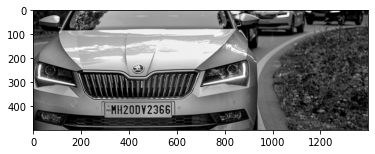

In [6]:
img = cv2.imread('car3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# 2. Apply filter and find edges for localization

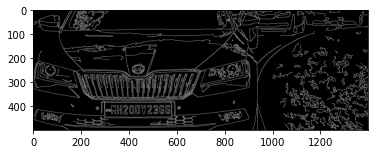

In [7]:
bfilter = cv2.bilateralFilter(gray , 11, 17, 17) #noise reduction
edged = cv2.Canny(bfilter, 30, 200) #edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# 3. Find Contours and Apply Mask

In [8]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [9]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [10]:
location

array([[[300, 387]],

       [[303, 445]],

       [[577, 443]],

       [[574, 384]]], dtype=int32)

In [11]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

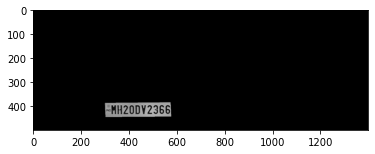

In [12]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [13]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

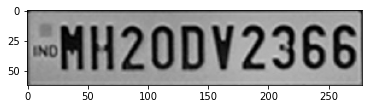

In [14]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# 4. Use Easy OCR To Read Text

In [15]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\DELL\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[3, 27], [27, 27], [27, 41], [3, 41]], '[4o', 0.07458649779593057),
 ([[18, 2], [278, 2], [278, 57], [18, 57]], "'NHZODV2366", 0.2576972321610003)]

# 5. Render Result

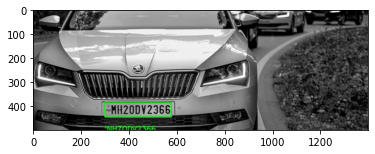

In [16]:
text = result[1][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,-1), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,-1),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [17]:
text

"'NHZODV2366"